<a href="https://colab.research.google.com/github/VitorFRodrigues/PUCMinas_DataScience/blob/main/03-Tec_Amostragem_Mod_regressao/Exercicios/TrabalhoFinal/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realizar um projeto utilizando um dos modelos apresentados na disciplina.

1 ) Acessar o https://www.kaggle.com/

2) Selecionar a base de escolha e que se adeque ao modelo.

3) Contextualizar o problema a ser resolvido.

4) processamento de dados

5) Analise de variáveis - análise descritiva

6) análise de correlação

7) validação de pressupostos

8) rodar o modelo

9) interpretação da saída (métricas de avaliação e coeficientes)

Entregar o notebook (em python ou r com as saídas comentadas com a sua interpretação) + a base de dados utilizada.

# Grupo 02

Instituição: Pontifícia Universidade Católica de Minas Gerais

Alunos:

* Alessandro Augusto Bezerra
* Robson Gomes de Lima
* Tiago Henrique Lacerda
* Vitor Fernando de Souza Rodrigues

Disciplina: Técnicas de Amostragem e Modelos de Regressão

Docente: Anaíle Mendes Rabelo

# 1. Introdução

Este projeto visa realizar um estudo de modelagem de regressão linear utilizando um conjunto de dados de imóveis para aluguel extraído do site Quinto Andar, disponibilizado na plataforma [Kaggle](https://www.kaggle.com/).


O objetivo é criar um modelo de regressão que possa prever o valor do aluguel de um imóvel com base nas suas características. Será realizada uma análise completa desde a coleta e limpeza dos dados, passando pela análise exploratória, construção e validação de modelos de regressão, até a interpretação dos resultados.


**Exploração de Dados:** Compreender as características do conjunto de dados e identificar padrões e insights principais.

**Pré-processamento de Dados:** Limpar e preparar os dados para modelagem, lidando com valores ausentes, codificação de variáveis categóricas e escalonamento de características.

**Construção de Modelos:** Desenvolver modelos preditivos utilizando modelo de Regressão Linear.

**Avaliação de Modelos:** Avaliar o desempenho dos modelos utilizando métricas apropriadas e validar sua eficácia.


# 2. Importação de bibliotecas

In [1]:
# Importação de bibliotecas usadas neste notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import ceil
import warnings
warnings.filterwarnings('ignore')

# 3. Coleta de dados dos arquivos

O conjunto de dados foi baixado a partir do [kaggle](https://www.kaggle.com/datasets/dantebarros/transformed-data-from-quinto-andars-platform). Para retirar a necessidade de download, o *dataset* foi upado para um site no github onde os dados crus ("raw") podem ser encontrados.

Este arquivo (**quinto andar transformed data**) representam dados que contém informações detalhadas sobre apartamentos e casas para aluguel no site do quinto andar.

In [2]:
url = 'https://media.githubusercontent.com/media/VitorFRodrigues/PUCMinas_DataScience/main/03-Tec_Amostragem_Mod_regressao/Exercicios/TrabalhoFinal/quinto_andar_transformed_data.csv'
dados = pd.read_csv(url)
dados.head()

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


Abaixo estão descritas as colunas deste dataframe. Vale salientar que os dados compilados aqui foram retirados do [site](https://www.quintoandar.com.br/) em 2019, sendo assim, os dados estão desatualizados. De todo modo, o método de elaboração do modelo de regressão treinado neste notebook permanece, podendo o mesmo ser retreinado com dados mais atuais.
# Descrição das Colunas
* `url`: Endereço eletrônico do imóvel.
* `bairro`: Bairro em que o imóvel se encontra.
* `aluguel`: Valor do aluguel.
* `condominio`: Valor do condomínio.
* `iptu`: Valor do IPTU.
* `seguro_incendio`: custo do seguro para incêndio.
* `taxa_serviço`: taxa de serviço.
* `total`: Soma de valores a contar de `aluguel` até `taxa_servico`.
* `metragem`: área do imóvel em metros quadrados.
* `quarto`: quantidade de quartos.
* `banheiro`: quantidade de banheiros.
* `vaga_carro`: quantidade de vagas para carro.
* `andar`: andar em que o imóvel se encontra.
* `aceita_pet`: se o imóvel aceita pets, sendo `1.0` = 'Sim' e `0.0` = 'Não'.
* `mobilia`: se o imóvel possui mobília, sendo `1.0` = 'Sim' e `0.0` = 'Não'.
* `metro_prox`: se há metrô nas proximidades, sendo `1.0` = 'Sim' e `0.0` = 'Não'.

In [3]:
print(f'Número total de linhas e colunas do dataset Quinto Andar: {dados.shape}')

Número total de linhas e colunas do dataset Quinto Andar: (2775, 16)


# 4. Análise do conjunto de dados

Inicialmente, vamos realizar uma análise rápida no dataframe, buscando entender os tipos de dados compostos em cada coluna, a existência de valores nulos e identificar os pontos de trabalho e limpeza a ser realizado mais a frente.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


Vemos que temos 2.775 linhas com valores em cada coluna, a exceção das colunas `condominio` e `iptu` que possuem valores nulos. Além disso, todas as colunas são do tipo float exceto `url` e `bairro` visto que este são tipo texto.

Vamos identificar estas linhas que contém valores nulos e quantificá-las.

In [5]:
dados_com_linhas_nulas = dados[dados.isnull().any(axis=1)]
dados_com_linhas_nulas

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0


In [6]:
percent = dados_com_linhas_nulas.shape[0]/dados.shape[0]
print(f'A quantidade de linhas com valores nulos representa {percent*100:.2f}% do total.')

A quantidade de linhas com valores nulos representa 0.54% do total.


Como a quantidade de linhas nulas é bastante pequena em relação ao montante total, vamos removê-las do dataframe.

In [7]:
dados.dropna(inplace=True)

In [8]:
dados.describe()


,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000
mean,2275.859783,597.582246,283.667754,29.893478,45.314493,3233.472464,63.691304,1.593116,1.398188,0.627536,5.939130,0.776087,0.202536,0.733696
std,1327.682018,429.929323,9436.591175,17.637881,26.582778,9612.624659,38.590559,0.748581,0.686796,0.674473,4.999013,0.416940,0.401962,0.442105
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.000000,28.000000,1877.500000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,54.000000,26.000000,39.000000,2613.500000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2730.000000,800.000000,140.000000,36.000000,54.000000,3752.250000,75.250000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


Com isto, temos um dataframe com 2.760 linhas e 14 colunas (as colunas `bairro` e `url` foram removidas para deixar apenas os valores numéricos).

Para este conjunto de dados vamos:

**`Criar modelo de regressão linear para buscar valores de aluguel dados as demais variáveis independentes.`**

Inicialmente analisaremos como cada variável reage graficamente em relação a variável `aluguel`.

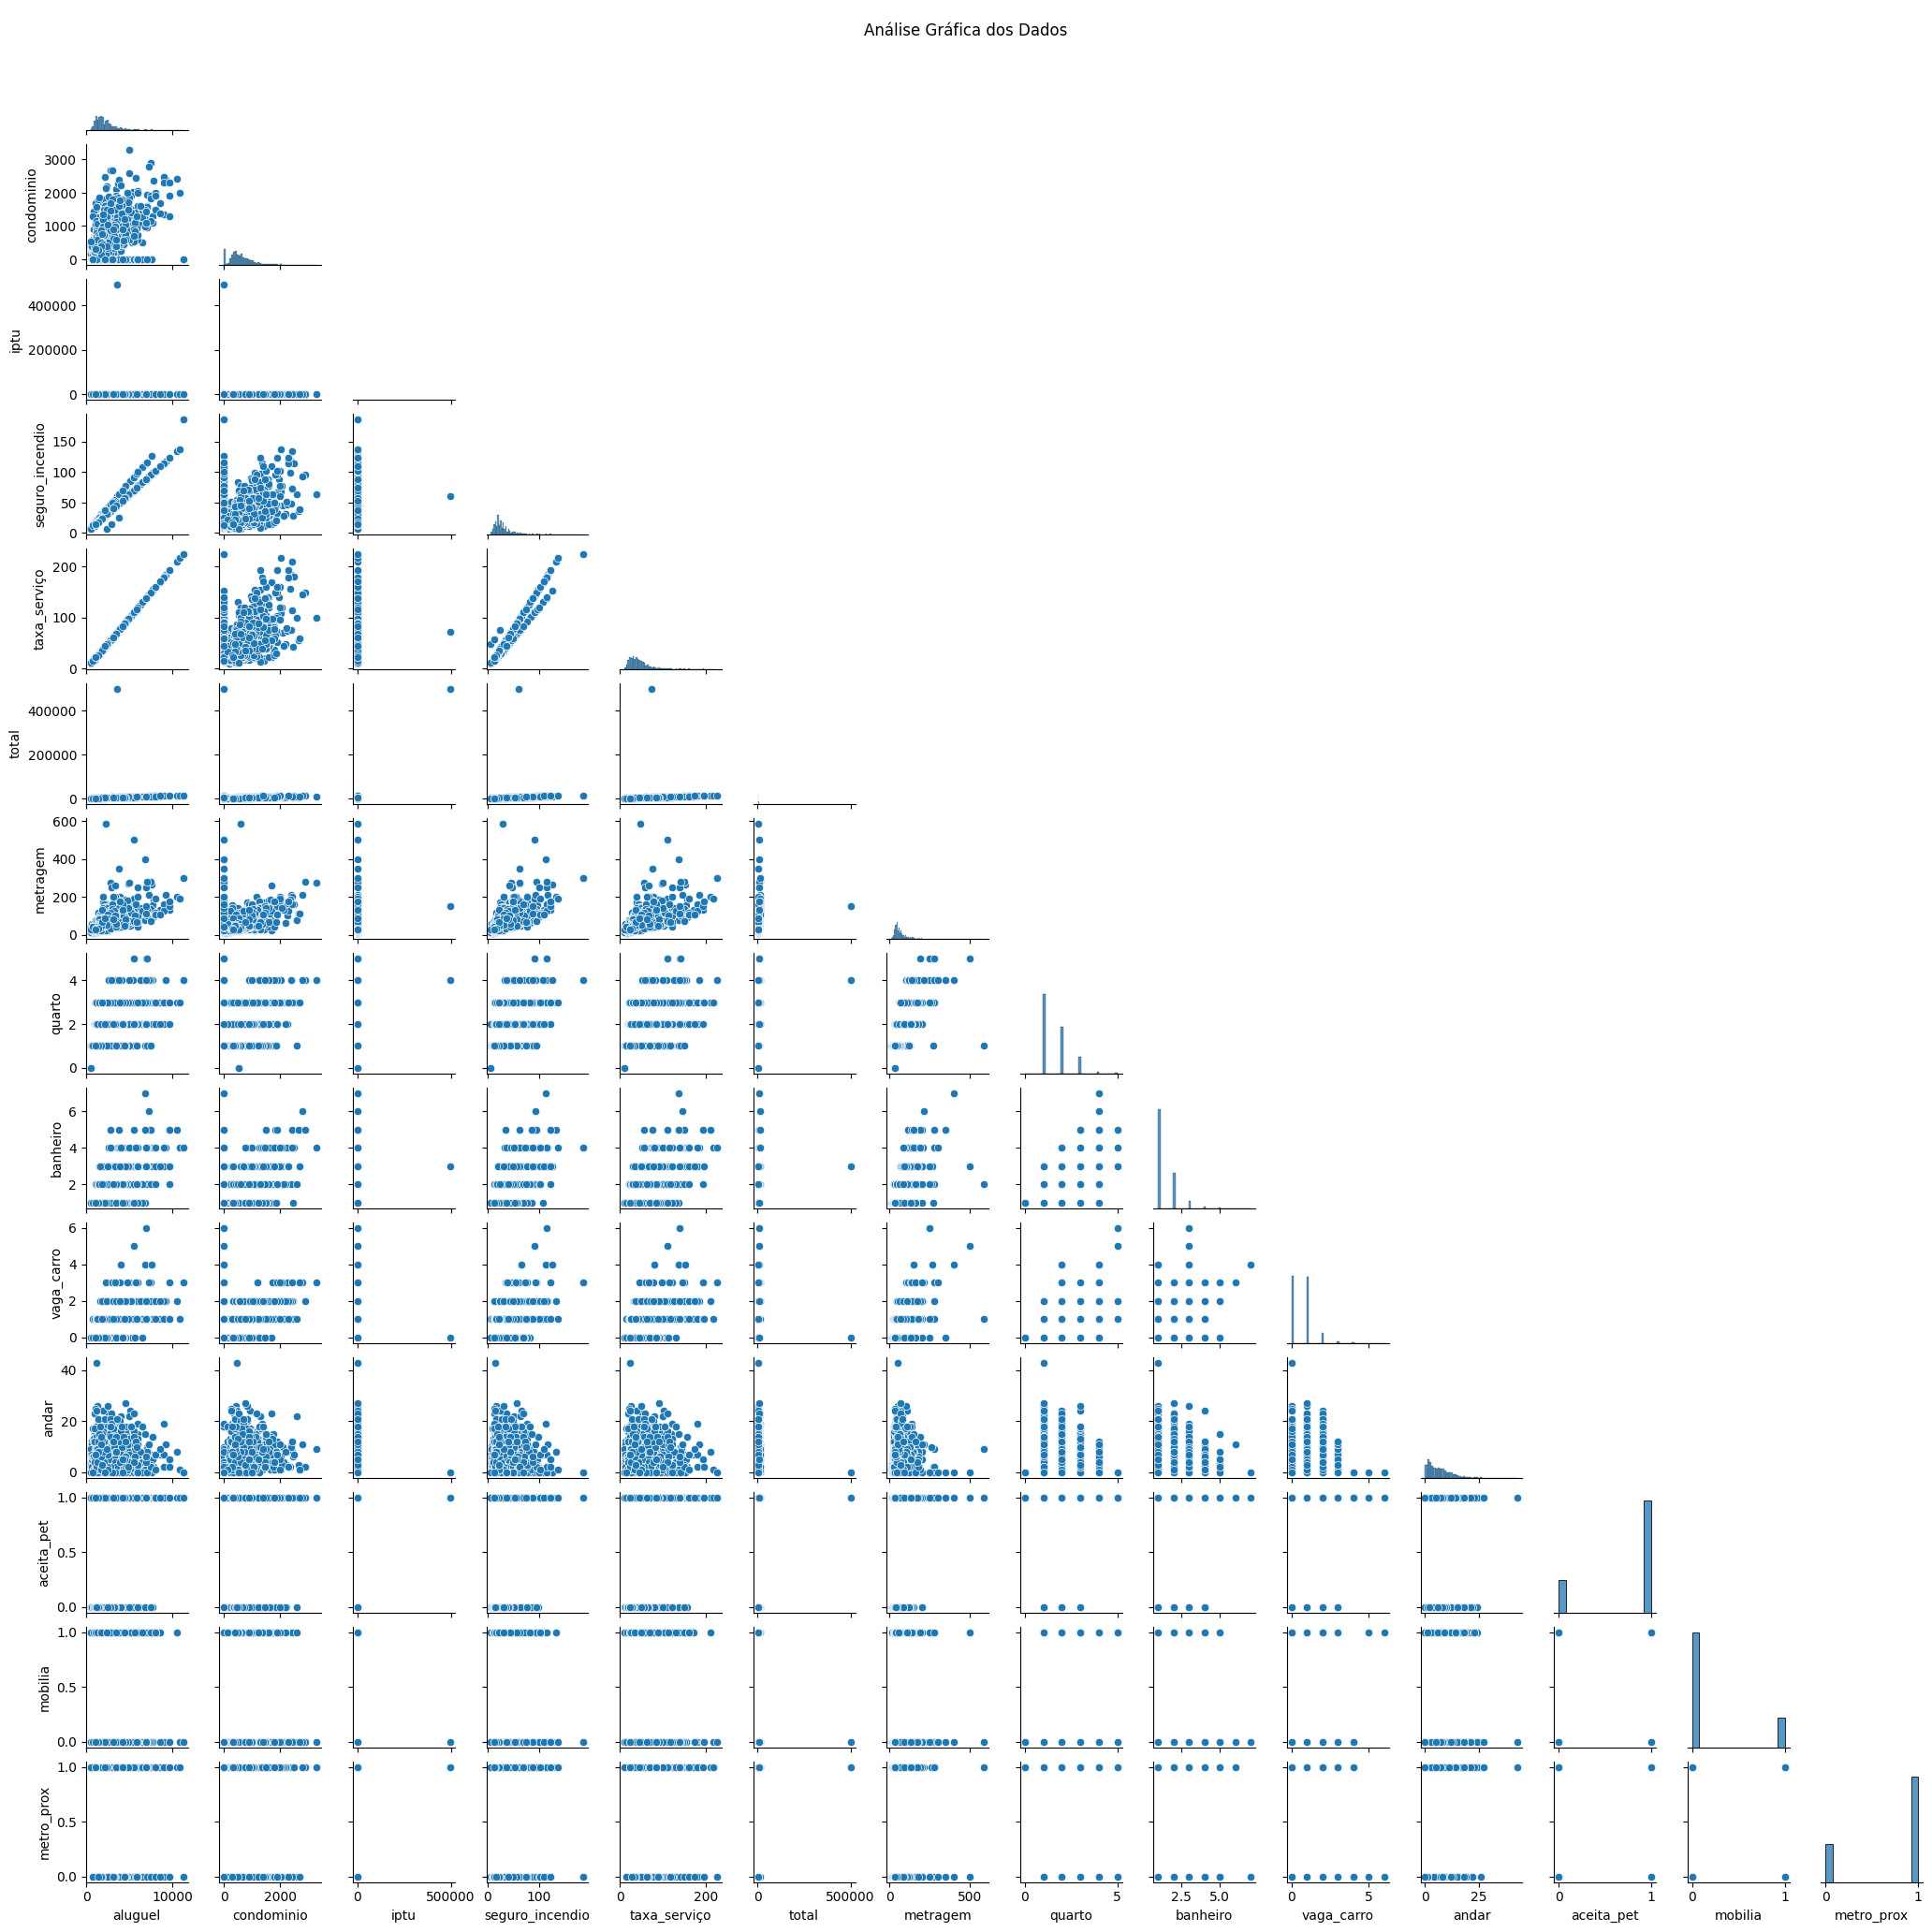

In [9]:
# Análise gráfica - Pairplot
sns.pairplot(dados, corner=True, height=1.5)
plt.suptitle("Análise Gráfica dos Dados")
plt.show()

É possível ver que custos como `seguro` e `taxa_serviço` possuem boa correlação com `aluguel`. Vamos analisar numericamente no mapa de correlação abaixo:

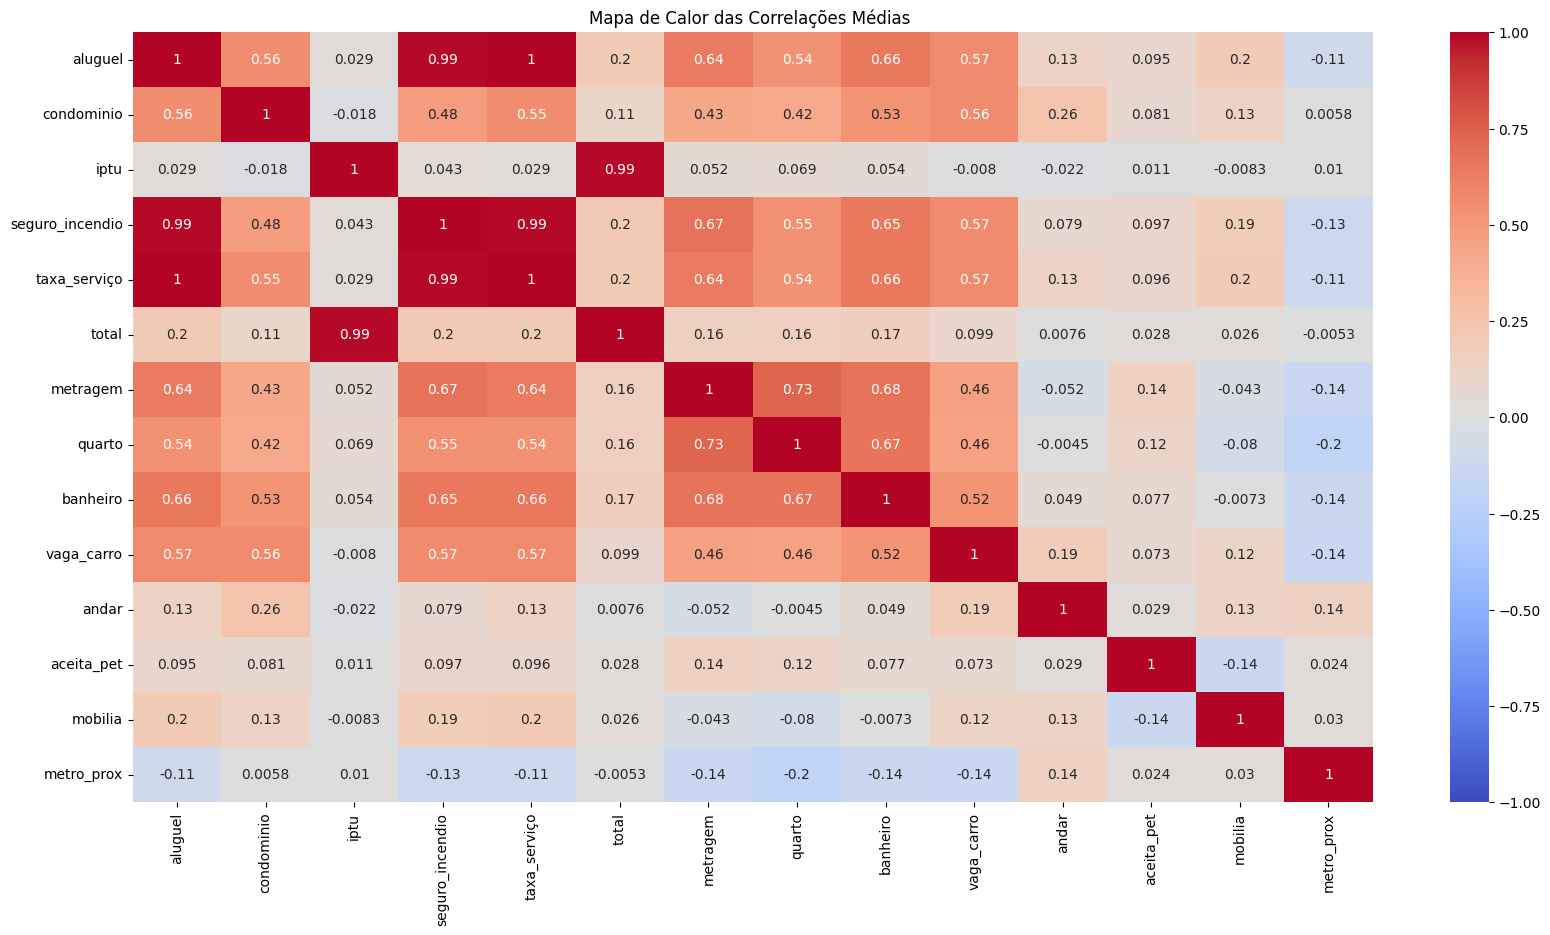

In [10]:
plt.figure(figsize=(20, 10))
corr = dados[dados.describe().columns].corr()
sns.heatmap(corr, annot=True,cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Mapa de Calor das Correlações Médias ')
plt.show()

Como mostrado na leitura gráfica, `seguro` e `taxa_serviço` possuem uma correlação de 0.99 e 1.00 respectivamente. Correlações muito próximas de um possuem uma alta colinearidade, podendo ocasionar em um *overfiting* com os dados de treino, tornando o modelo baixo em previsibilidade.

Para provar isto, criaremos 2 modelos para análise sendo:

| Modelo   | Corr<sub>min</sub> | Corr<sub>máx</sub> |
|----------|:------------------:|:------------------:|
| modelo_1 | 0.3                | 0.7                |
| modelo_2 | 0.3                | 1.0                |


In [11]:
filtro_correlacao_max = 0.7
filtro_correlacao_min = 0.3
lista_selecionada_1 = corr['aluguel'][(corr['aluguel'].abs() > filtro_correlacao_min) & (corr['aluguel'].abs() < filtro_correlacao_max)].sort_values(ascending=False).index.to_list()[1:]
lista_selecionada_1

['metragem', 'vaga_carro', 'condominio', 'quarto']

In [12]:
filtro_correlacao_max = 1
filtro_correlacao_min = 0.3
lista_selecionada_2 = corr['aluguel'][(corr['aluguel'].abs() > filtro_correlacao_min) & (corr['aluguel'].abs() < filtro_correlacao_max)].sort_values(ascending=False).index.to_list()[1:]
lista_selecionada_2

['seguro_incendio',
 'banheiro',
 'metragem',
 'vaga_carro',
 'condominio',
 'quarto']

### 4.1. Análise por Bairro e criação do modelo 3


Além destes modelos, criaremos um terceiro modelo especial que analisará a influência que a coluna `bairro` podem ocasionar, se adicionada ao cálculo.

Primeiramente, a coluna `bairro` é do tipo `object` contendo o nome de 36 bairros conforme as localidades de cada apartamento:

In [13]:
print(f'Bairros pontuados no dataframe: {dados["bairro"].unique()}')

Bairros pontuados no dataframe: ['Liberdade' 'Santa Cecília' 'Aclimação' 'Vila Guilherme' 'Pari'
 'Perdizes' 'Barra Funda' 'Ipiranga' 'Mooca' 'Casa Verde'
 'Jardim Paulista' 'Paraíso' 'Consolação' 'Sumaré' 'Centro' 'Belém'
 'Cambuci' 'Brás' 'Bela Vista' 'Vila Mariana' 'Vila Maria ' 'Pinheiros'
 'Bom Retiro' 'Vila Pompéia' 'Higienópolis' 'Canindé' 'Vila Olímpia'
 'Vila Nova Conceição' 'Itaim Bibi' 'Santana' 'Vila Prudente'
 'Água Branca' 'Vila Clementino' 'Jardim América' 'Moema' 'Pacaembu']


In [14]:
print(f'Quantidade total de bairros no dataframe: {dados["bairro"].unique().shape[0]}')

Quantidade total de bairros no dataframe: 36


Há duas maneiras para analisarmos a variável `bairro`:

- Separação de todo o conjunto via `pd.get_dummies`;
- Análise por `bairro` das demais variáveis;


#### 4.1.1. Separação de todo o conjunto via `pd.get_dummies`

Vamos analisar primeiramente o `pd.get_dummies`. Para evitar alterações desnecessária no DataFrame original, vamos criar um novo dataframe nomeado como `dados_dummies_aluguel`

In [15]:
dados_dummies_aluguel = pd.get_dummies(dados, columns=['bairro'], drop_first=True)

Separação de variáveis dependentes e independentes. Para variáveis independentes estamos considerando a coluna `bairro` e `quarto`.

In [16]:
X_aluguel = dados_dummies_aluguel[['quarto'] + [col for col in dados_dummies_aluguel.columns if 'bairro_' in col]]
y_aluguel = dados_dummies_aluguel['aluguel']


In [17]:
# Separação dos dados em test train
X_aluguel_train, X_aluguel_test, y_aluguel_train, y_aluguel_test = train_test_split(X_aluguel, y_aluguel, test_size=0.3, random_state=42)

In [18]:
# regressão linear (Considerando a lib scikit-learn)
modelo_aluguel = LinearRegression()
modelo_aluguel.fit(X_aluguel_train, y_aluguel_train)
y_aluguel_pred = modelo_aluguel.predict(X_aluguel_test)

In [19]:
# Criar um DataFrame com os valores preditos usando o índice de X_aluguel
aluguel_pred_df = pd.DataFrame({'aluguel_pred': modelo_aluguel.predict(X_aluguel)}, index=X_aluguel.index)

# Juntar o DataFrame original ('dados') com o DataFrame de predições usando o índice,
# adicionando sufixos para evitar conflito de nomes de colunas
dados_dummies_aluguel = dados.join(aluguel_pred_df, how='left', lsuffix='_original', rsuffix='_predito') # adiciona sufixos para diferenciar as colunas 'aluguel_pred'

In [20]:
# Avaliar o modelo
r2_aluguel = r2_score(y_aluguel_test, y_aluguel_pred)
rmse_aluguel = mean_squared_error(y_aluguel_test, y_aluguel_pred, squared=False)

# Adicionar a coluna com os valores preditivos do aluguel e o valor real ao DataFrame dados_dummies_aluguel
dados_dummies_aluguel['aluguel_pred'] = modelo_aluguel.predict(X_aluguel)

In [21]:
dados_com_predicoes_aluguel = dados_dummies_aluguel[['bairro', 'quarto', 'aluguel', 'aluguel_pred']]

In [22]:
r2_aluguel, rmse_aluguel

(0.5042091673680604, 952.147646903384)

In [23]:
dados_com_predicoes_aluguel

,bairro,quarto,aluguel,aluguel_pred
0,Liberdade,1.0,1900.0,1101.209254
1,Santa Cecília,1.0,1190.0,1414.155025
2,Aclimação,1.0,2330.0,1751.499153
3,Liberdade,1.0,1850.0,1101.209254
4,Vila Guilherme,2.0,2200.0,1737.116298
...,...,...,...,...
2770,Aclimação,2.0,2200.0,2614.545839
2771,Santa Cecília,1.0,1120.0,1414.155025
2772,Belém,1.0,1350.0,1165.487412
2773,Aclimação,1.0,1100.0,1751.499153


Apesar de estatisticamente não ser o modelo ideal para a análise, pois não captura toda a variabilidade do aluguel, podemos constatar que existem bairros com valores elevados e outros com valores medianos.

O modelo não consegue prever os valores de aluguel com precisão devido ao desvio padrão significativo de aproximadamente R$ 952.15.

No entanto, essa avaliação permite identificar se os valores estão abaixo ou acima da média, considerando o bairro em que estão localizados e a quantidade de quartos.

---
#### 4.1.2. Análise por `bairro` das demais variáveis

Segunda metodologia de análise proposta é averiguar bairro a bairro quais as variáveis independentes com maior correlação. Após seleção, vamos analisar o `summary` de cada um e verificar a variação do p-value.

Inicialmente vamos plotar múltiplas matrizes de correlação para os bairros mais populares (aqueles que aparecem no DataFrame uma contagem superior a 100 ocorrências).

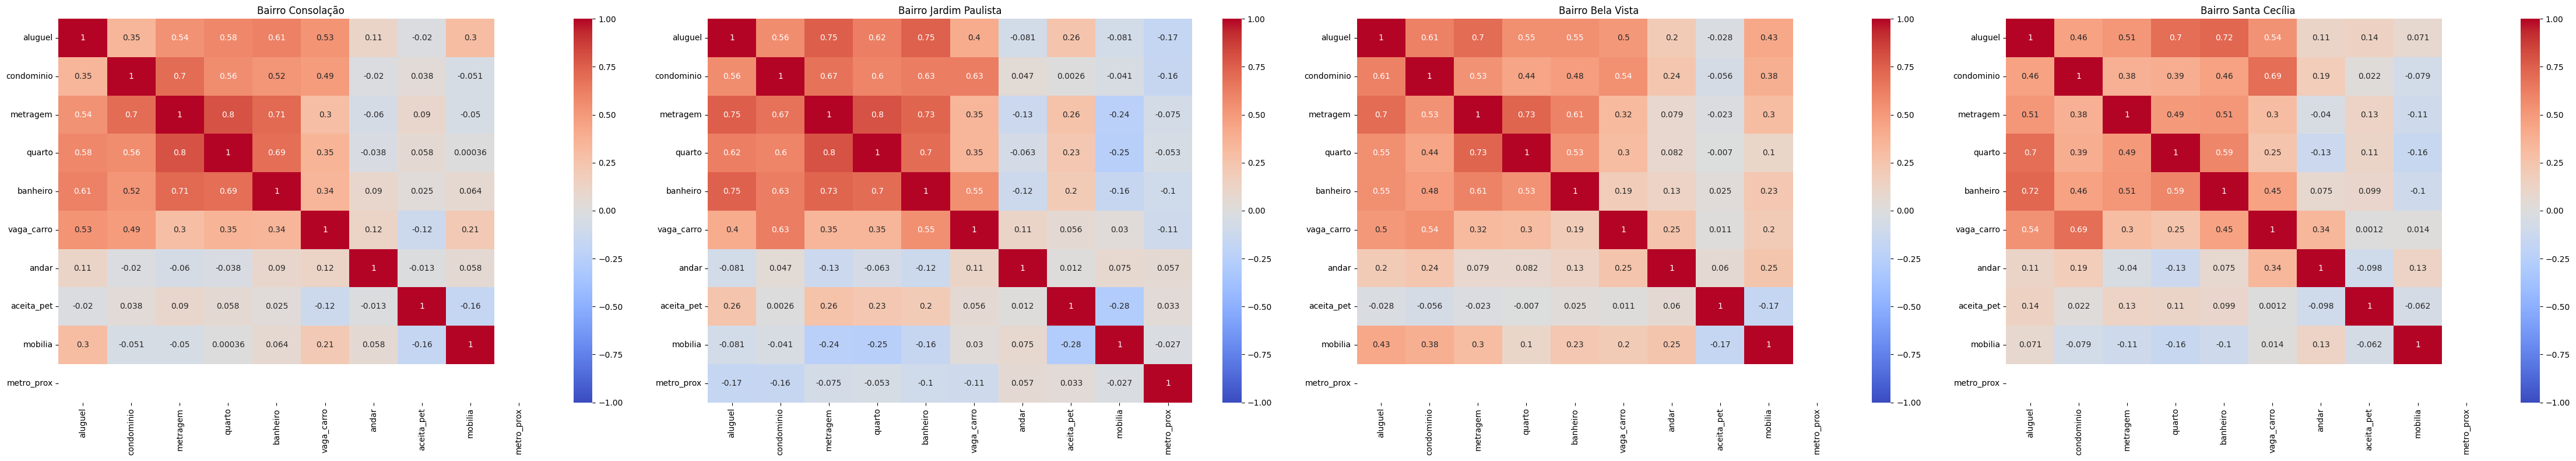

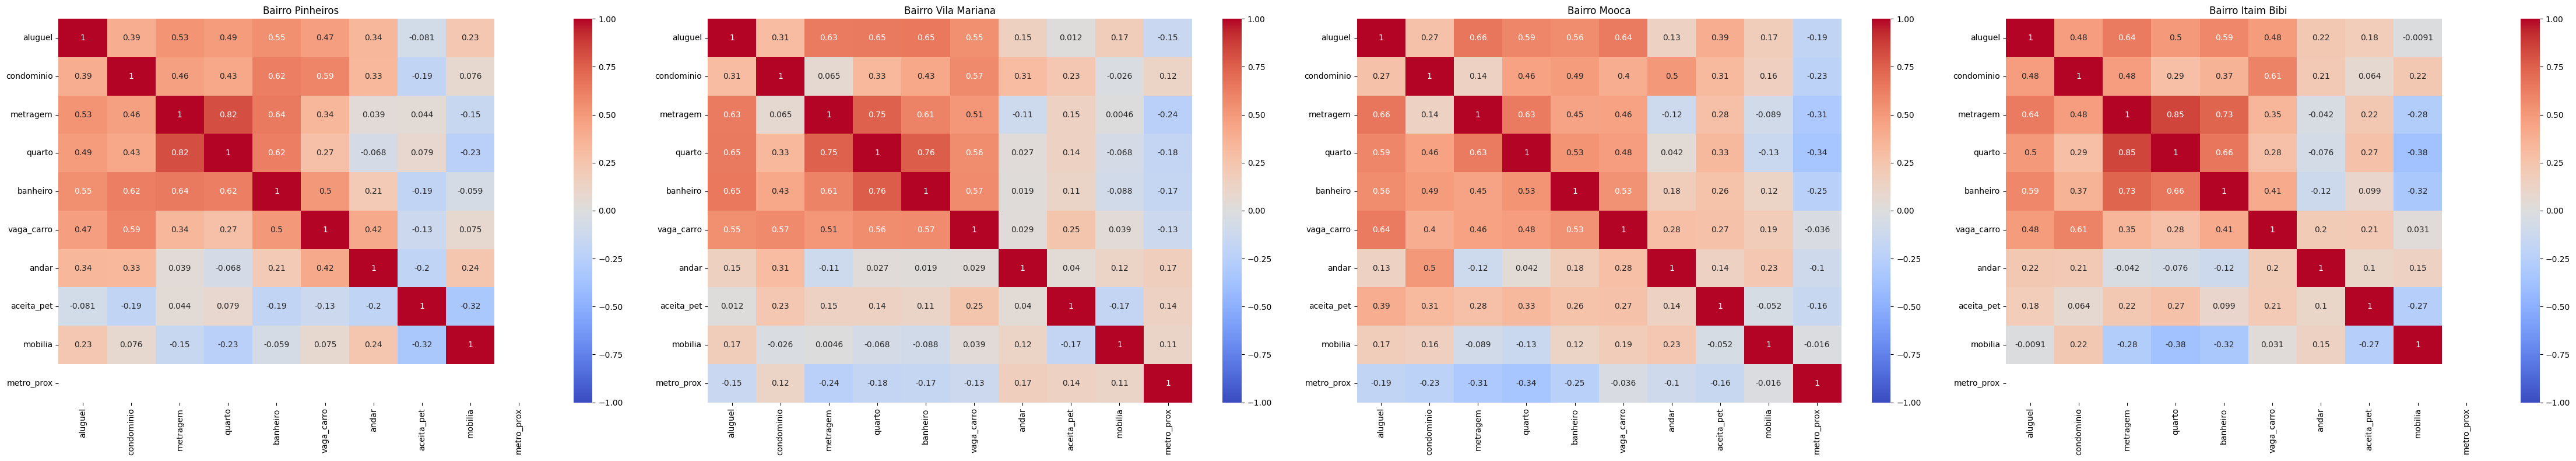

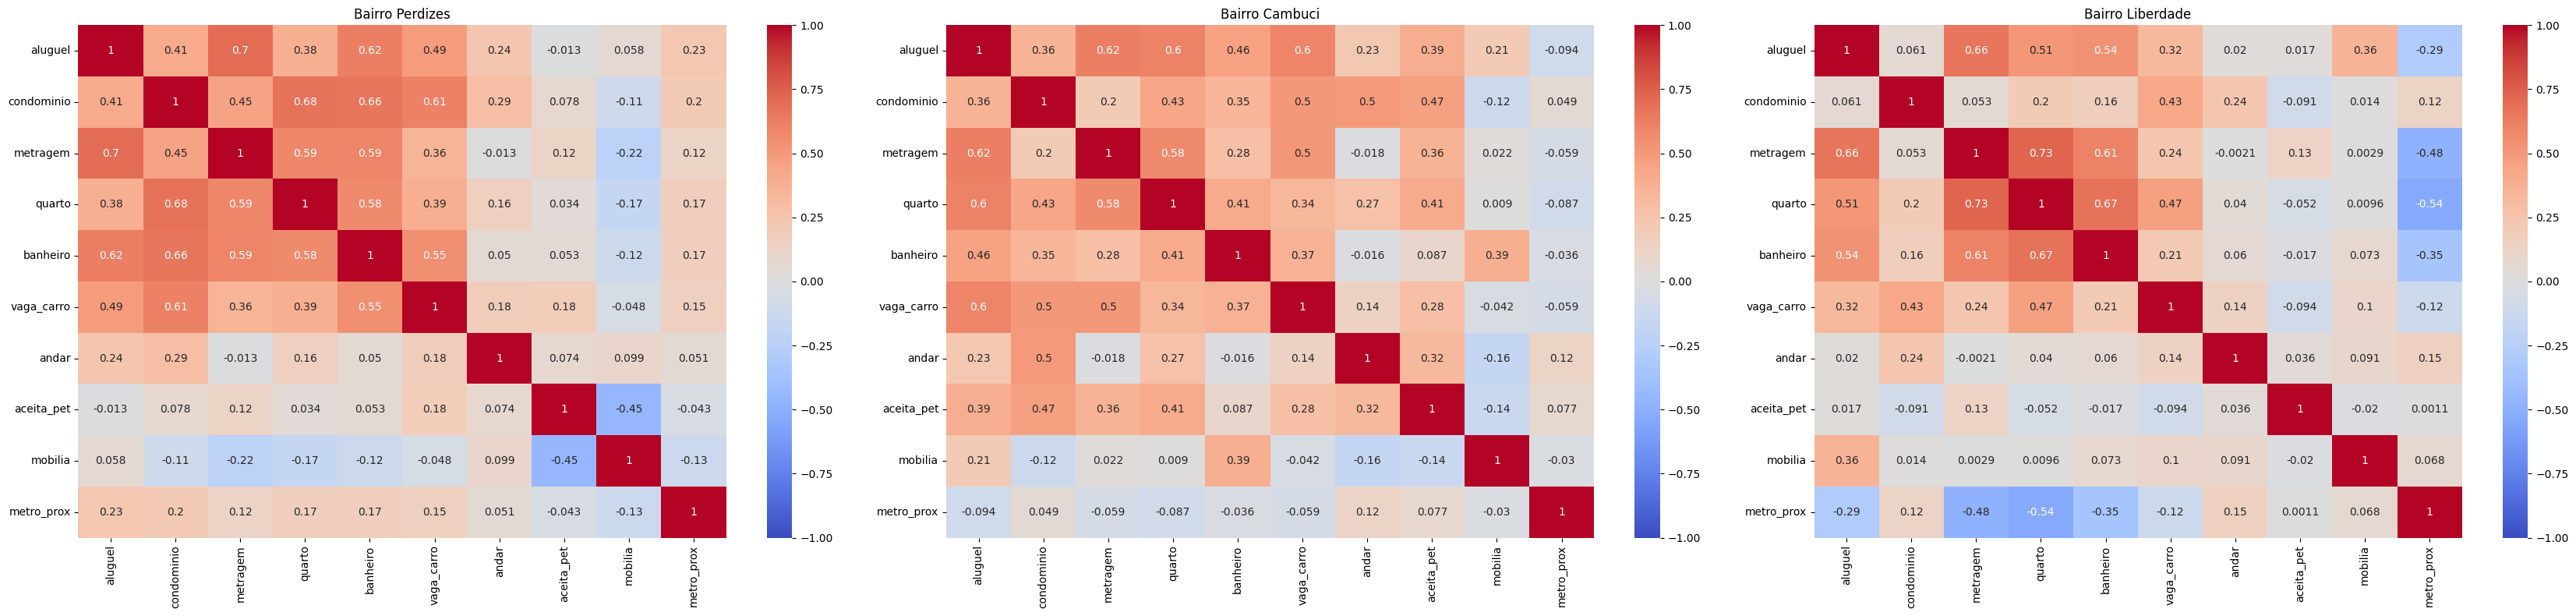

In [24]:
# Remover colunas especificadas
colunas_para_remover = ['iptu', 'seguro_incendio', 'taxa_serviço', 'total']
colunas_existentes = [col for col in colunas_para_remover if col in dados.columns]
dados1 = dados.drop(columns=colunas_existentes)

# Filtrar bairros com mais de 100 imóveis
contagem_bairros = dados1['bairro'].value_counts()
bairros_filtrados = contagem_bairros[contagem_bairros > 100].index

# Configurar a figura para múltiplos gráficos
plt.figure(figsize=(45, 8))
num_bairros = len(bairros_filtrados)

for i, bairro in enumerate(bairros_filtrados):
    # Filtrar o DataFrame para o bairro atual
    data_bairro = dados1[dados1['bairro'] == bairro].select_dtypes(include=['number'])
    corr_bairro = data_bairro.corr()
      # Plotar o mapa de calor
    plt.subplot(1, 4, i % 4 + 1)
    sns.heatmap(corr_bairro, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Bairro {bairro}')

    # Mostrar e criar nova figura a cada 3 gráficos
    if (i + 1) % 4 == 0 or i == num_bairros - 1:
        plt.tight_layout()
        plt.show()
        if i != num_bairros - 1:
            plt.figure(figsize=(45, 8))

Com estas matrizes de correlação, podemos identificar as 3 maiores correlações bairro a bairro.

In [25]:
for i, bairro in enumerate(bairros_filtrados):
    # Filtrar o DataFrame para o bairro atual
    data_bairro = dados1[dados1['bairro'] == bairro].select_dtypes(include=['number'])

    # Calcular a matriz de correlação para o bairro atual
    corr_bairro = data_bairro.corr()

    # Selecionar as 3 maiores correlações absolutas com 'aluguel', excluindo 'aluguel' da lista
    correlações_aluguel = corr_bairro['aluguel'].drop(labels='aluguel').abs()
    maiores_correlações = correlações_aluguel.nlargest(3)
    lista_selecionada_3 = maiores_correlações.index.to_list()

    print(f"As três maiores correlações para o bairro {bairro} são: {lista_selecionada_3}")

As três maiores correlações para o bairro Consolação são: ['banheiro', 'quarto', 'metragem']
As três maiores correlações para o bairro Jardim Paulista são: ['metragem', 'banheiro', 'quarto']
As três maiores correlações para o bairro Bela Vista são: ['metragem', 'condominio', 'banheiro']
As três maiores correlações para o bairro Santa Cecília são: ['banheiro', 'quarto', 'vaga_carro']
As três maiores correlações para o bairro Pinheiros são: ['banheiro', 'metragem', 'quarto']
As três maiores correlações para o bairro Vila Mariana são: ['banheiro', 'quarto', 'metragem']
As três maiores correlações para o bairro Mooca são: ['metragem', 'vaga_carro', 'quarto']
As três maiores correlações para o bairro Itaim Bibi são: ['metragem', 'banheiro', 'quarto']
As três maiores correlações para o bairro Perdizes são: ['metragem', 'banheiro', 'vaga_carro']
As três maiores correlações para o bairro Cambuci são: ['metragem', 'quarto', 'vaga_carro']
As três maiores correlações para o bairro Liberdade são: 

Com isto, será realizado treinamentos destes modelos e imprimiremos o `summary` para cada.

In [26]:
for i, bairro in enumerate(bairros_filtrados):

    # Definindo a variável dependente e independentes para o bairro atual
    X = data_bairro[lista_selecionada_3]  # Variável independente
    y = data_bairro['aluguel']  # Variável dependente

    # Adicionando uma constante à variável independente
    X = sm.add_constant(X)

    # Ajustando o modelo de regressão linear
    modelo_3 = sm.OLS(y, X).fit()

    # Sumário do modelo
    modelo_summary_3 = modelo_3.summary()

    # Imprimindo o sumário do modelo para o bairro atual
    print(f"Sumário do modelo para o bairro {bairro}:")
    print(modelo_summary_3)
    print("\n")
    print("\n")

Sumário do modelo para o bairro Consolação:
                            OLS Regression Results                            
Dep. Variable:                aluguel   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     28.94
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.37e-13
Time:                        20:33:03   Log-Likelihood:                -791.52
No. Observations:                 105   AIC:                             1591.
Df Residuals:                     101   BIC:                             1602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

Com isto, vemos que as variáveis independentes `banheiro` e `metragem` possuem P-value abaixo de `0.05`. As demais variáveis não explicam o modelo com boa exatidão. Disto isto, o modelo 3 terá como variáveis independentes:

In [27]:
lista_selecionada_3 = ['banheiro', 'metragem']

# 5. Criação do modelo

Separação de variáveis dependentes e independentes, definição de modelo, sumarização de resultados:

In [28]:
# Definindo a variável dependente e independentes
X_1 = dados[lista_selecionada_1]  # Variável independente
X_2 = dados[lista_selecionada_2]  # Variável independente
X_3 = dados[lista_selecionada_3]  # Variável independente

# If 'aluguel' is not present, correct the column name
y = dados['aluguel']  # Variável dependente  # Changed the column name to 'Aluguel', adjust if necessary

# Adicionando uma constante à variável independente
X_1 = sm.add_constant(X_1)
X_2 = sm.add_constant(X_2)
X_3 = sm.add_constant(X_3)

# Ajustando o modelo de regressão linear
modelo_1 = sm.OLS(y, X_1).fit()
modelo_2 = sm.OLS(y, X_2).fit()
modelo_3 = sm.OLS(y, X_3).fit()

# Sumário do modelo
modelo_summary_1 = modelo_1.summary()
modelo_summary_2 = modelo_2.summary()
modelo_summary_3 = modelo_3.summary()

# sm.OLS() é usado para ajustar o modelo de regressão linear ordinária.
# sm.add_constant() é necessário pois o OLS não adiciona automaticamente a constante (intercepto).

# 6. Análise dos pressupostos e validação do modelo

Nesta seção, vamos analisar os modelos e verificar o melhor dado alguns testes da literatura. Ao final, vamos resumi-los.

## 6.1. Teste de Homocedasticidade com Breusch-Pagan

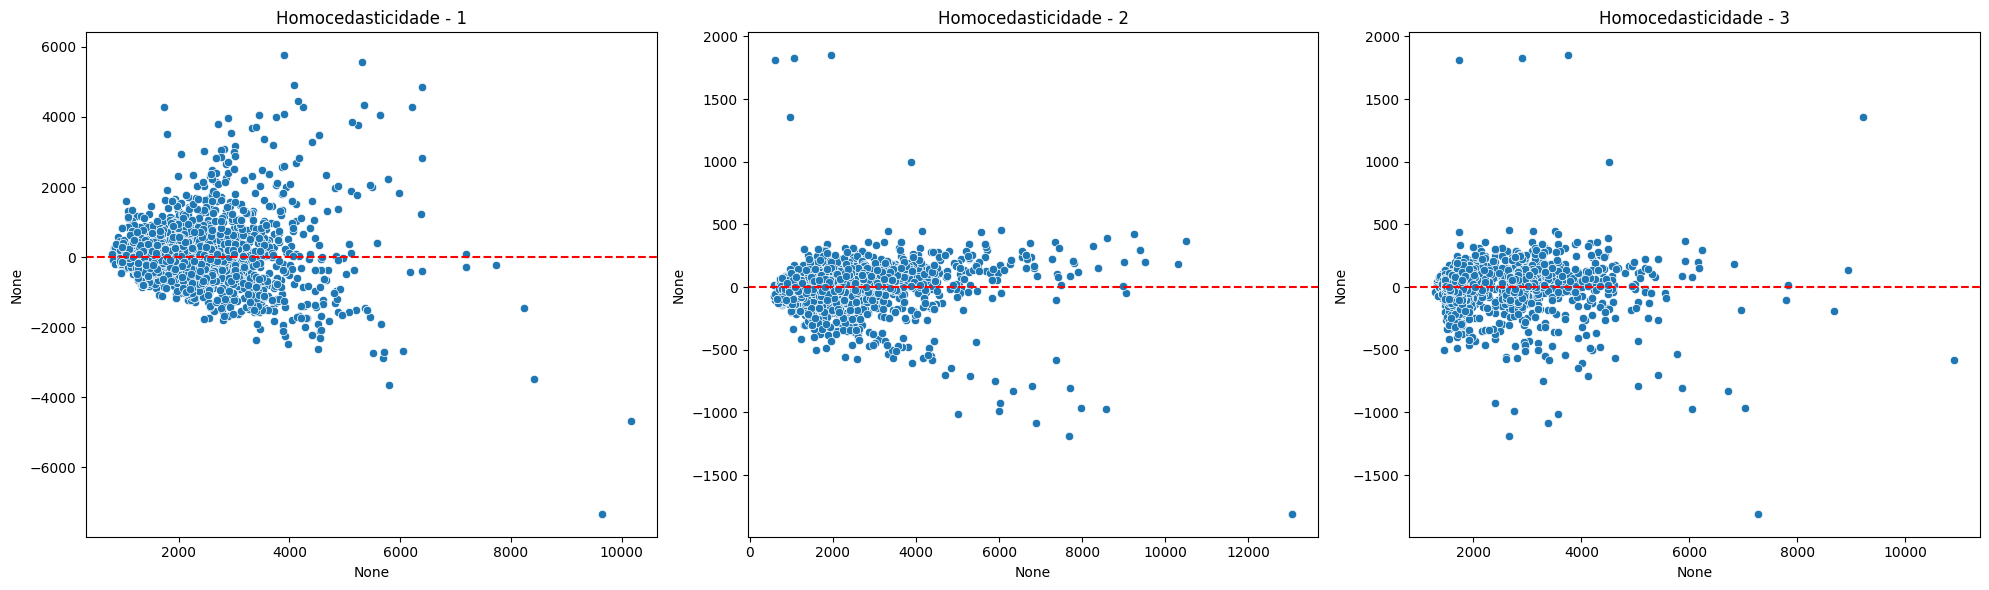

In [29]:
# Resíduos dos modelos
residuos_1 = modelo_1.resid
residuos_2 = modelo_2.resid
residuos_3 = modelo_3.resid

# Gráfico de homocedasticidade
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=modelo_1.fittedvalues, y=residuos_1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - 1')

plt.subplot(1, 3, 2)
sns.scatterplot(x=modelo_2.fittedvalues, y=residuos_2)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - 2')

plt.subplot(1, 3, 3)
sns.scatterplot(x=modelo_3.fittedvalues, y=residuos_2)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - 3')

plt.tight_layout()
plt.show()

A homocedasticidade significa que a variância dos resíduos é constante ao longo de todos os níveis dos valores previstos (fitted values). Vamos analisar os gráficos fornecidos:

* **Análise do Gráfico de Homocedasticidade - 1**

  1. **Distribuição dos Resíduos**: Os resíduos parecem dispersos de forma razoavelmente uniforme em torno da linha vermelha (y=0), o que é um bom sinal de homocedasticidade.
  2. **Padrão de Ventilador**: Há uma leve tendência de aumento na dispersão dos resíduos à medida que os valores previstos aumentam, o que pode indicar uma ligeira heterocedasticidade.
  3. **Outliers**: Existem alguns pontos extremos, especialmente em valores previstos maiores, que podem ser outliers influentes.

* **Análise do Gráfico de Homocedasticidade - 2**

  1. **Distribuição dos Resíduos**: A dispersão dos resíduos é mais compacta em comparação com o primeiro gráfico, o que sugere uma melhor homocedasticidade.
  2. **Padrão de Ventilador**: A tendência de aumento na dispersão dos resíduos à medida que os valores previstos aumentam é menos pronunciada, indicando menos heterocedasticidade.
  3. **Outliers**: Embora ainda existam alguns pontos extremos, eles são menos frequentes e menos dispersos em comparação com o primeiro gráfico.

* **Análise do Gráfico de Homocedasticidade - 3**

  1. **Distribuição dos Resíduos**: A dispersão dos resíduos é mais compacta em comparação com o primeiro gráfico, porém mais dispersa que o segundo.
  2. **Padrão de Ventilador**: A tendência de aumento na dispersão dos resíduos à medida que os valores previstos aumentam é menos pronunciada, indicando menos heterocedasticidade.
  3. **Outliers**: Embora ainda existam alguns pontos extremos, eles são menos frequentes e menos dispersos em comparação com o primeiro gráfico, porém ainda um pouco mais em relação ao segundo.

- **Modelo 1**: Mostra uma leve heterocedasticidade com um padrão de ventilador crescente, o que sugere que a variância dos resíduos aumenta com os valores previstos. Existem alguns outliers notáveis que podem influenciar o modelo.
- **Modelo 2**: Apresenta uma melhor homocedasticidade com uma dispersão mais uniforme dos resíduos. Menos outliers são visíveis e a tendência de aumento na variância dos resíduos é menos pronunciada.
- **Modelo 3**: Apresenta uma segunda melhor homocedasticidade com uma dispersão mais uniforme dos resíduos. Menos outliers são visíveis e a tendência de aumento na variância dos resíduos é menos pronunciada.

O **Modelo 2** parece ser preferível com base nos gráficos de homocedasticidade, pois apresenta uma variância mais constante dos resíduos e menos outliers. Isso sugere que este modelo pode ser mais robusto e fornecer previsões mais confiáveis.

## 6.2. Breusch-Pagan

In [30]:
# Calcula os resíduos do modelo
# Criação de uma lista de tuplas com os modelos e seus respectivos nomes
modelos = [
    ("modelo_1", modelo_1, dados[lista_selecionada_1]),
    ("modelo_2", modelo_2, dados[lista_selecionada_2]),

    ("modelo_3", modelo_3, dados[lista_selecionada_3])
]

for nome, modelo, col in modelos:
    estatistica, p, f, fp = het_breuschpagan(modelo.resid, modelo.model.exog)
    print(f'Estatísticas de teste para {nome}: {estatistica:.2e}')
    print(f'p-valor: {p:.2e}')
    print(f'f-valor: {fp:.2e}')
    print(f'f_p-valor: {f:.2e}\n')

Estatísticas de teste para modelo_1: 7.08e+02
p-valor: 6.33e-152
f-valor: 1.62e-175
f_p-valor: 2.38e+02

Estatísticas de teste para modelo_2: 3.92e+02
p-valor: 1.86e-81
f-valor: 6.76e-88
f_p-valor: 7.58e+01

Estatísticas de teste para modelo_3: 4.96e+02
p-valor: 1.54e-108
f-valor: 1.88e-119
f_p-valor: 3.02e+02



Os resultados dos testes de Breusch-Pagan para ambos os modelos fornecem uma avaliação quantitativa da homocedasticidade. Vamos analisar os resultados fornecidos:

- **Estatística de Teste**: Valores maiores indicam maior evidência contra a homocedasticidade.
- **p-valor**: Valores muito pequenos (próximos de zero) indicam que rejeitamos a hipótese nula de homocedasticidade (ou seja, há evidência de heterocedasticidade).
- **f-valor** e **f_p-valor**: Valores muito pequenos indicam a mesma coisa, rejeitando a hipótese nula de homocedasticidade.

**Comparação dos Modelos**

- **Modelo 1**:
  - Tem as maiores estatísticas de teste e p-valores extremamente pequenos, indicando uma forte presença de heterocedasticidade.
  - f-valor e f_p-valor são muito baixos, sugerindo um ajuste não ideal.

- **Modelo 2**:
  - Apresenta estatísticas de teste e p-valores significativamente menores do que o Modelo 1, indicando uma menor presença de heterocedasticidade.
  - f-valor e f_p-valor são maiores comparados ao Modelo 1, sugerindo um ajuste melhor.

- **Modelo 3**:
  - Estatísticas de teste e p-valores estão entre os valores do Modelo 1 e Modelo 2.
  - f-valor e f_p-valor também estão em um nível intermediário.

Entre os três modelos, o **Modelo 2** parece ser o melhor em termos de homocedasticidade. Ele apresenta estatísticas de teste e p-valores menores, indicando menor heterocedasticidade. Isso confirma a análise visual dos gráficos de homocedasticidade. Portanto, o **Modelo 2** seria o mais robusto e confiável entre os três.

## 6.3. Teste de Normalidade dos Resíduos com Shapiro-Wilk

In [31]:
for nome, modelo, col in modelos:
    estatistica_shapiro,p_shapiro = stats.shapiro(modelo.resid)
    print(f'Estatísticas de teste {nome}: {estatistica_shapiro:.2e}')
    print(f'p-valor: {p_shapiro:.2e}\n')

Estatísticas de teste modelo_1: 8.88e-01
p-valor: 6.86e-41

Estatísticas de teste modelo_2: 7.57e-01
p-valor: 0.00e+00

Estatísticas de teste modelo_3: 8.83e-01
p-valor: 1.69e-41



Os resultados do teste de Shapiro-Wilk fornecem uma avaliação da normalidade dos resíduos dos modelos. Vamos analisar os resultados fornecidos:

- **Estatística de Teste**: Valores próximos de 1 indicam que os resíduos estão mais próximos de uma distribuição normal.
- **p-valor**: Valores muito pequenos (próximos de zero) indicam que rejeitamos a hipótese nula de normalidade (ou seja, há evidência de que os resíduos não são normalmente distribuídos).

- **Modelo 1**:
  - Estatística de teste de \(0.888\), que é relativamente próxima de 1, sugere que os resíduos estão mais próximos de seguir uma distribuição normal em comparação com o Modelo 2.
  - p-valor muito baixo indica que ainda há evidência significativa de que os resíduos não são normalmente distribuídos.

- **Modelo 2**:
  - Estatística de teste de \(0.757\), que é bem mais baixa, indica que os resíduos estão mais distantes de seguir uma distribuição normal em comparação com o Modelo 1.
  - p-valor de \(0.00\) indica uma forte evidência de que os resíduos não são normalmente distribuídos.

- **Modelo 3**:
  - Estatística de teste de \(0.883\) ligeiramente menor que o Modelo 1, mas ainda mais próximo de 1 do que o Modelo 2.
  - p-valor muito pequeno, indicando uma forte evidência contra a normalidade.

Portanto, Entre os três modelos, o **Modelo 1** tem os resíduos que mais se aproximam de uma distribuição normal, seguido de perto pelo Modelo 3. O Modelo 2 tem os resíduos que mais se desviam da normalidade. Portanto, em termos de normalidade dos resíduos, o Modelo 1 é o mais adequado.

## 6.4. Análise de normalidade QQ-plot

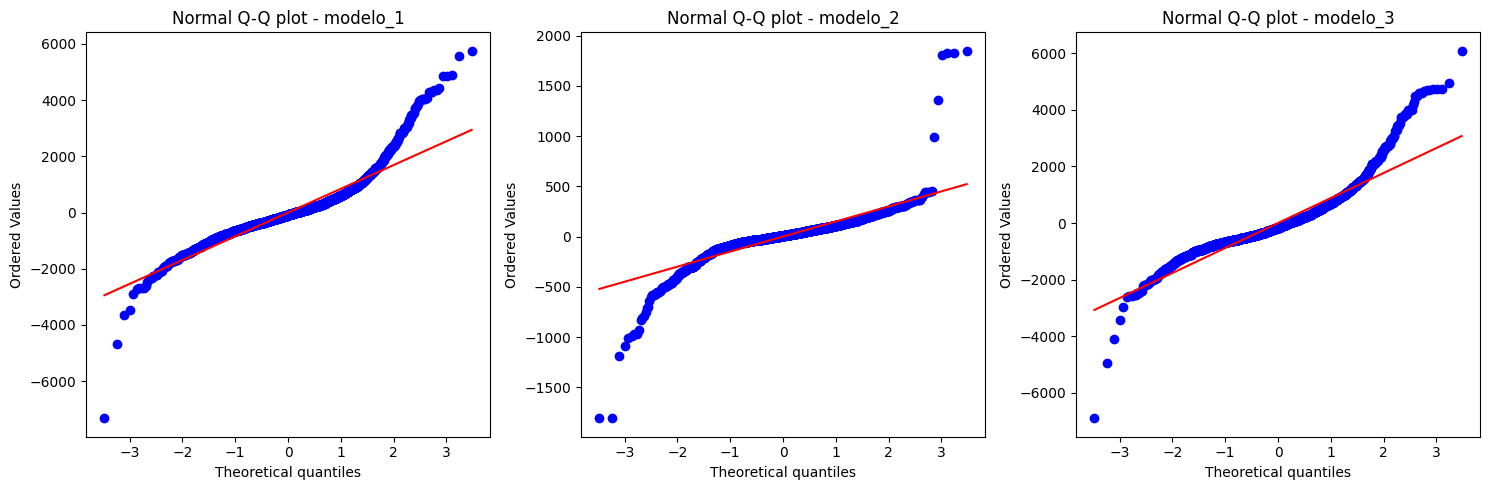

In [32]:
num_modelos = len(modelos)
fig, axes = plt.subplots(1, num_modelos, figsize=(5 * num_modelos, 5))

for ax, (nome, modelo, col) in zip(axes, modelos):
    stats.probplot(modelo.resid,dist="norm", plot=ax)
    ax.set_title(f"Normal Q-Q plot - {nome}")
plt.tight_layout()
plt.show()

Os gráficos Q-Q (Quantile-Quantile) são utilizados para verificar visualmente a normalidade dos resíduos. Eles comparam os quantis dos resíduos com os quantis de uma distribuição normal teórica. Se os resíduos seguem uma distribuição normal, os pontos do gráfico Q-Q devem seguir aproximadamente a linha reta (45 graus).

- **Observações do  Modelo 1**:
  - No gráfico Q-Q para o Modelo 1, a maioria dos pontos está próxima da linha reta, indicando que os resíduos estão relativamente próximos de uma distribuição normal.
  - No entanto, há alguns desvios nas extremidades, o que sugere a presença de outliers ou uma leve não normalidade nas caudas.

- **Observações do Modelo 2**:
  - No gráfico Q-Q para o Modelo 2, há um desvio maior dos pontos em relação à linha reta, especialmente nas extremidades.
  - Isso indica que os resíduos do Modelo 2 estão mais distantes de uma distribuição normal em comparação com o Modelo 1.

- **Observações do Modelo 3**:
  - Similar ao Modelo 1, a maioria dos pontos se alinham com a linha de normalidade, com alguma divergência nas extremidades.
  - Os resíduos do Modelo 3 também seguem a distribuição normal razoavelmente bem, com desvios nas extremidades, indicando a presença de outliers.

Os três modelos apresentam algum grau de desvio da normalidade nos resíduos, mas o **Modelo 3** tem um desempenho melhor em termos de seguir uma distribuição normal e menos deformidade, conforme indicado tanto pelo teste de Shapiro-Wilk quanto pelos gráficos Q-Q. Os desvios nas extremidades do Modelo 3 são menos pronunciados do que os do Modelo 1 e 2, sugerindo que o Modelo 3 é mais adequado em termos de normalidade dos resíduos.

## 6.5. Análise de resíduos Padronizados

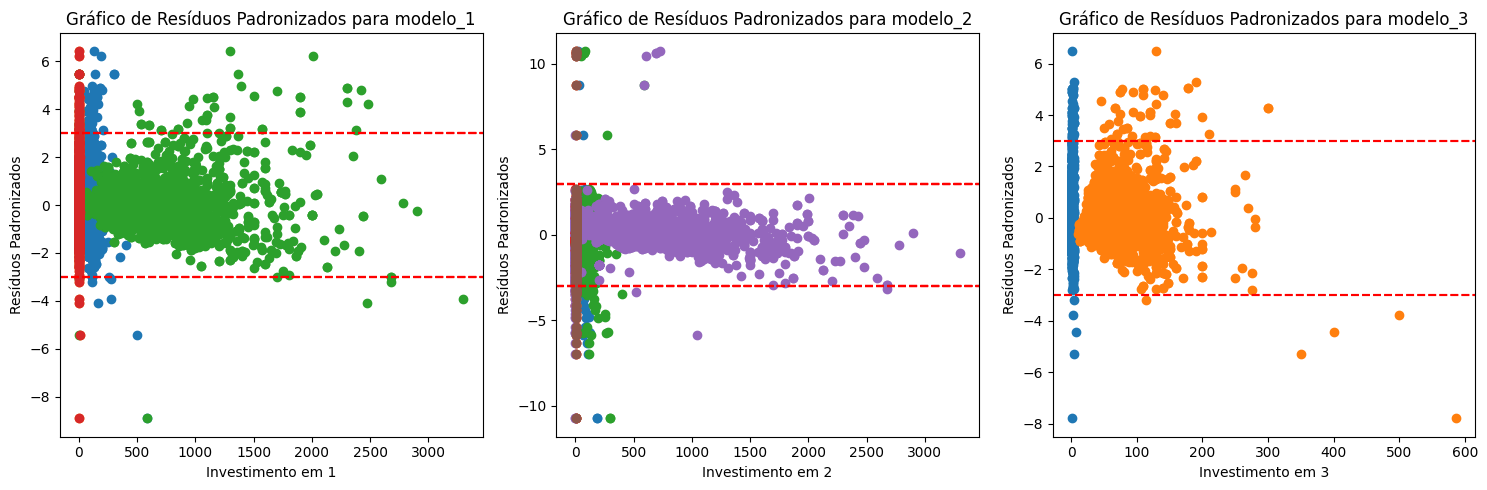

In [33]:
num_modelos = len(modelos)

fig, axes = plt.subplots(1, num_modelos, figsize=(5 * num_modelos, 5))

for ax, (nome, modelo, col) in zip(axes, modelos):
    residuos_padronizados = modelo.get_influence().resid_studentized_internal

    # Cria um gráfico de resíduos
    if isinstance(col, pd.Series):
        ax.scatter(col, residuos_padronizados)
        ax.axhline(y=3, color='r', linestyle='--')
        ax.axhline(y=-3, color='r', linestyle='--')
        ax.set_title(f'Gráfico de Resíduos Padronizados para {nome}')
        ax.set_xlabel('Investimento em ' + nome.split("_")[1].capitalize())
        ax.set_ylabel('Resíduos Padronizados')
    else:
        for i in col.columns:
            ax.scatter(col[i], residuos_padronizados)
            ax.axhline(y=3, color='r', linestyle='--')
            ax.axhline(y=-3, color='r', linestyle='--')
            ax.set_title(f'Gráfico de Resíduos Padronizados para {nome}')
            ax.set_xlabel('Investimento em ' + nome.split("_")[1].capitalize())
            ax.set_ylabel('Resíduos Padronizados')

plt.tight_layout()
plt.show()

Os gráficos de resíduos padronizados são úteis para identificar padrões nos resíduos que podem sugerir problemas com o modelo, como heterocedasticidade, outliers, ou falta de ajuste.

- **Observações do Modelo 1**:
  - A maioria dos resíduos está concentrada dentro do intervalo de -2 a 2, indicando que a maioria dos resíduos está dentro da faixa esperada para resíduos padronizados.
  - Há alguns resíduos fora da faixa de -2 a 2, indicando a presença de outliers.
  - A distribuição dos resíduos parece espalhada de maneira relativamente uniforme, embora haja um leve afunilamento conforme o valor do "Investimento em 1" aumenta, o que pode sugerir algum grau de heterocedasticidade.

- **Observações do Modelo 2**:
  - A maioria dos resíduos está concentrada dentro do intervalo de -2 a 2, mas há um número maior de resíduos fora dessa faixa em comparação com o Modelo 1, sugerindo mais outliers.
  - A distribuição dos resíduos mostra uma maior variabilidade para valores mais altos de "Investimento em 2", indicando uma potencial heterocedasticidade mais pronunciada.
  - Há alguns resíduos padronizados que se desviam significativamente, chegando até -10 e 10, o que sugere a presença de outliers severos.

- **Observações do Modelo 3**:
   - A maioria dos resíduos padronizados está dentro do intervalo de -2 a 2, com menos outliers comparado aos outros modelos. No entanto, ainda há alguns pontos fora desse intervalo.
   - Os resíduos do Modelo 3 mostram menos variabilidade e menos outliers em comparação com os Modelos 1 e 2. A distribuição dos resíduos parece mais uniforme, indicando um ajuste melhor aos dados, mas ainda há alguma heterocedasticidade.

Com base na análise dos gráficos de resíduos padronizados, o **Modelo 3** é o mais adequado entre os três, mostrando menos outliers e uma distribuição mais uniforme dos resíduos. O **Modelo 2** é o menos adequado, com a maior heterocedasticidade e muitos outliers. O **Modelo 1** também apresenta alguns problemas de heterocedasticidade, mas é melhor que o Modelo 2.

Portanto, entre os três modelos, o Modelo 3 é preferível em termos de distribuição e variância dos resíduos, embora ainda haja algumas áreas que podem ser melhoradas.


## 6.6. Análise geral dos resíduos

Abaixo segue uma tabela dos modelos testados indicando o melhor modelo ao final:

| Teste                          | Métrica                     | Modelo 1                  | Modelo 2                  | Modelo 3                  | Vencedor    |
|--------------------------------|-----------------------------|---------------------------|---------------------------|---------------------------|-------------|
| Homocedasticidade - Breusch-Pagan | Estatísticas de teste       | 7.08e+02                  | 3.92e+02                  | 4.96e+02                  | Modelo 2    |
|                                | p-valor                     | 6.33e-152                 | 1.86e-81                  | 1.54e-108                 |             |
|                                | f-valor                     | 1.62e-175                 | 6.76e-88                  | 1.88e-119                 |             |
|                                | f_p-valor                   | 2.38e+02                  | 7.58e+01                  | 3.02e+02                  |             |
| Normalidade dos Resíduos - Shapiro-Wilk | Estatísticas de teste       | 8.88e-01                  | 7.57e-01                  | 8.83e-01                  | Modelo 1    |
|                                | p-valor                     | 6.86e-41                  | 0.00e+00                  | 1.69e-41                  |             |
| Q-Q plot                       | Conformidade com a linha 45° | Melhor                    | Pior                      | Menos deformidade         | Modelo 3    |
| Resíduos Padronizados          | Distribuição de resíduos    | Menos outliers e dispersão | Mais outliers e dispersão | Menos outliers            | Modelo 3    |

O **Modelo 3** é o vencedor geral em termos de conformidade com a homocedasticidade, Q-Q plot e distribuição de resíduos padronizados. Embora o Modelo 1 tenha se saído ligeiramente melhor no teste de Shapiro-Wilk, o Modelo 3 apresenta um desempenho mais robusto em outros aspectos importantes da análise de resíduos.

# 7. Análise do modelo

## 7.1. Análise de Multicolinearidade

In [34]:
vifs = [
    add_constant(dados[lista_selecionada_1]),
    add_constant(dados[lista_selecionada_2]),
    add_constant(dados[lista_selecionada_3]),
]

for vif in vifs:
    print(pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns))
    print()


const         5.948216
metragem      2.254426
vaga_carro    1.634365
condominio    1.557562
quarto        2.235372
dtype: float64

const              6.749534
seguro_incendio    2.344723
banheiro           2.561748
metragem           2.866632
vaga_carro         1.804433
condominio         1.663092
quarto             2.448807
dtype: float64

const       5.285241
banheiro    1.839744
metragem    1.839744
dtype: float64



**Comparação entre Modelos**:

| Métrica          | Modelo 1                  | Modelo 2                  | Modelo 3                  | Melhor Modelo         |
|------------------|---------------------------|---------------------------|---------------------------|-----------------------|
| const            | 5.948216                  | 6.749534                  | 5.285241                  | Modelo 3              |
| metragem         | 2.254426                  | 2.866632                  | 1.839744                  | Modelo 3              |
| vaga_carro       | 1.634365                  | 1.804433                  | -                         | Modelo 1              |
| condominio       | 1.557562                  | 1.663092                  | -                         | Modelo 1              |
| quarto           | 2.235372                  | 2.448807                  | -                         | Modelo 1              |
| seguro_incendio  | -                         | 2.344723                  | -                         | Modelo 2              |
| banheiro         | -                         | 2.561748                  | 1.839744                  | Modelo 3              |


Baseando-se na análise de VIF:

Modelo 3 apresenta os menores valores de VIF, indicando menor multicolinearidade em comparação com os Modelos 1 e 2.

Modelo 1 tem valores de VIF mais baixos em geral, exceto para const, que é moderadamente elevado.

Modelo 2 possui o maior valor de VIF para const e também tem mais variáveis com VIF entre 2 e 3, sugerindo mais multicolinearidade em comparação com os outros modelos.

Portanto, **Modelo 3** é o vencedor na análise de multicolinearidade, seguido pelo Modelo 1.

## 7.2. Testes T, F e R² ajustado

In [35]:
# Iterar sobre os modelos, exceto o último
for nome, modelo, dados in modelos:
    print(f'Modelo: {nome}')
    print(f'{str(modelo.summary())}\n')


Modelo: modelo_1
                            OLS Regression Results                            
Dep. Variable:                aluguel   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     819.6
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:33:07   Log-Likelihood:                -22682.
No. Observations:                2760   AIC:                         4.537e+04
Df Residuals:                    2755   BIC:                         4.540e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        567.9747     41.680   

Vamos analisar o teste T, teste F e R² Ajustado para os dois modelos:

**Modelo 1:**

**Teste T**:
- Todos os coeficientes, exceto "quarto", são estatisticamente significativos (p-valor < 0.05), indicando que eles têm um impacto significativo sobre a variável dependente "aluguel".

**Teste F**:
- F-statistic: 819.6, p-valor do F-statistic: 0.00
- O valor elevado da F-statistic e o p-valor de 0.00 indicam que o modelo como um todo é significativo.

**R² Ajustado**:
- R²: 0.543
- Adj. R²: 0.543
- O R² Ajustado de 0.543 sugere que 54.3% da variação no "aluguel" é explicada pelos preditores no modelo.

**Modelo 2:**

**Teste T**:
- A maioria dos coeficientes é estatisticamente significativa, exceto "const" e "quarto".

**Teste F**:
- F-statistic: 26780, p-valor do F-statistic: 0.00
- O valor extremamente elevado da F-statistic e o p-valor de 0.00 indicam que o modelo como um todo é altamente significativo.

**R² Ajustado**:
- R²: 0.983
- Adj. R²: 0.983
- O R² Ajustado de 0.983 sugere que 98.3% da variação no "aluguel" é explicada pelos preditores no modelo, indicando um ajuste muito bom do modelo aos dados.

**Tabela Resumo:**

| Métrica         | Modelo 1                 | Modelo 2                 |
|-----------------|--------------------------|--------------------------|
| **Teste T**     | Significativos: 4/5      | Significativos: 5/7      |
| **Teste F**     | F = 819.6, p-valor = 0.00| F = 26780, p-valor = 0.00|
| **R² Ajustado** | 0.543                    | 0.983                    |

---

**Modelo Vencedor**: **Modelo 2**, com base no R² Ajustado, teste F e maior número de variáveis significativas no teste T.

**Comparação dos Modelos: Testes T, F e R² Ajustado**

| Métrica                       | Modelo 1                   | Modelo 2                   | Modelo 3                   | Vencedor    |
|-------------------------------|----------------------------|----------------------------|----------------------------|-------------|
| **R² Ajustado**               | 0.543                      | 0.983                      | 0.500                      | Modelo 2    |
| **F-statistic**               | 819.6                      | 26780                      | 1378                       | Modelo 2    |
| **Prob (F-statistic)**        | 0.00                       | 0.00                       | 0.00                       | Empate      |
| **AIC**                       | 45370                      | 36270                      | 45620                      | Modelo 2    |
| **BIC**                       | 45400                      | 36310                      | 45640                      | Modelo 2    |
| **Log-Likelihood**            | -22682                     | -18128                     | -22807                     | Modelo 2    |
| **Durbin-Watson**             | 1.928                      | 1.960                      | 1.924                      | Modelo 2    |
| **Coeficiente (const)**       | 567.9747 (t=13.627)        | -6.7274 (t=-0.789)         | 372.4399 (t=9.062)         | Modelo 1    |
| **Coeficiente (metragem)**    | 13.8203 (t=20.781)         | -2.5080 (t=-17.407)        | 12.3478 (t=19.648)         | Modelo 1    |
| **Coeficiente (vaga_carro)**  | 475.2465 (t=14.669)        | -44.8104 (t=-6.851)        | -                          | Modelo 1    |
| **Coeficiente (condominio)**  | 0.7219 (t=14.549)          | 0.3526 (t=35.796)          | -                          | Modelo 2    |
| **Coeficiente (quarto)**      | 61.5456 (t=1.803)          | 9.3719 (t=1.365)           | -                          | Modelo 1    |
| **Coeficiente (seguro_incendio)** | -                      | 73.8432 (t=259.007)        | -                          | Modelo 2    |
| **Coeficiente (banheiro)**    | -                          | 26.7266 (t=3.492)          | 798.8706 (t=22.624)        | Modelo 3    |

**Análise Detalhada**

1. **R² Ajustado**:
   - **Modelo 2** apresenta o maior R² ajustado (0.983), indicando que este modelo explica a maior proporção da variância no aluguel.

2. **F-statistic**:
   - **Modelo 2** tem o maior F-statistic (26780), sugerindo que o modelo é significativamente melhor em comparação com os outros.

3. **Prob (F-statistic)**:
   - Todos os modelos têm um p-valor de 0.00, indicando que os modelos são estatisticamente significativos.

4. **AIC e BIC**:
   - **Modelo 2** possui os menores valores de AIC (36270) e BIC (36310), sugerindo que este é o modelo mais parcimonioso.

5. **Coeficientes e Teste T**:
   - **Modelo 1** apresenta coeficientes significativos para a maioria das variáveis com t-valores altos, exceto `quarto`.
   - **Modelo 2** tem coeficientes significativos para a maioria das variáveis com t-valores altos, exceto `const` e `quarto`.
   - **Modelo 3** tem coeficientes significativos para `banheiro` e `metragem` com t-valores muito altos.

Portanto, o **Modelo 2** é o vencedor geral na maioria dos critérios, incluindo R² ajustado, F-statistic, AIC, BIC. Embora o **Modelo 1** tenha coeficientes significativos e bons t-valores, o **Modelo 2** ainda se destaca como o melhor modelo devido ao seu alto poder explicativo e melhor ajuste.

## 7.3. Gráfico dos modelos ajustados

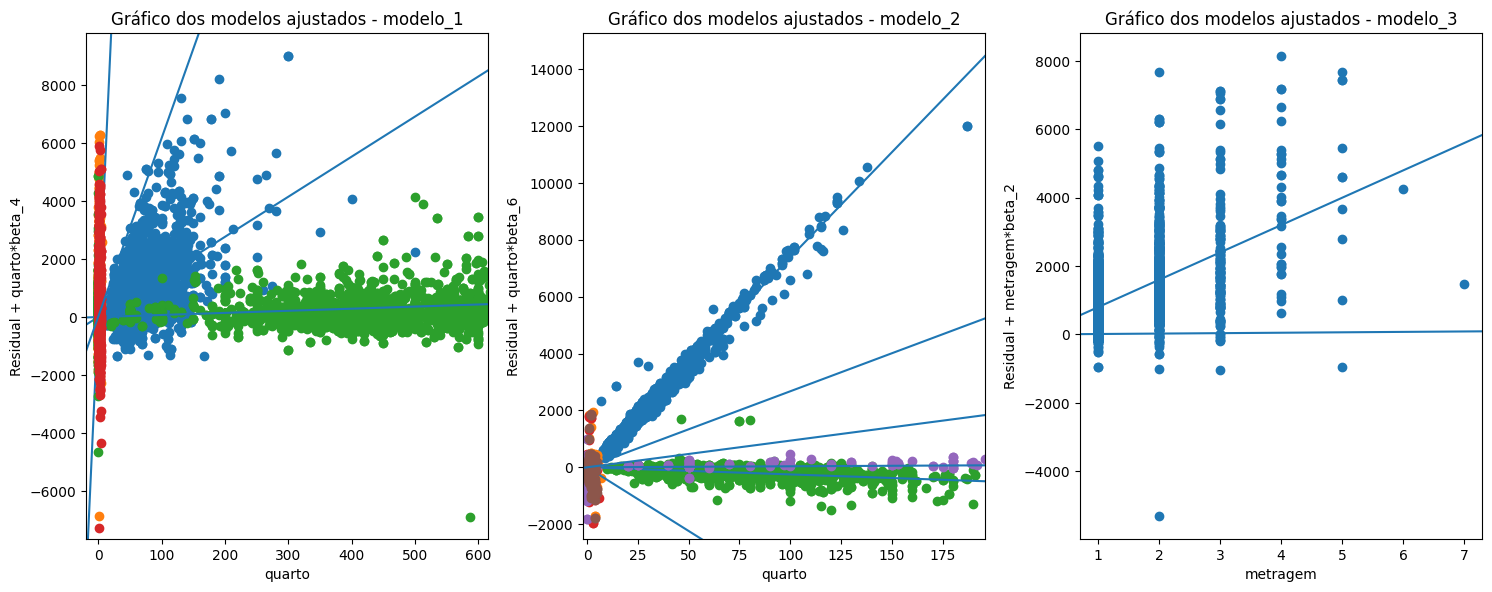

In [36]:
num_modelos = len(modelos)
fig, axes = plt.subplots(1, num_modelos, figsize=(5 * num_modelos, 6))

for ax, (nome, modelo, col) in zip(axes, modelos):
    if isinstance(col, pd.Series):
        sm.graphics.plot_ccpr(modelo, col.name, ax=ax)
        ax.set_title(f"Gráfico dos modelos ajustados - {nome}")
    else:
        for i in col.columns:
            sm.graphics.plot_ccpr(modelo, i, ax=ax)
        ax.set_title(f"Gráfico dos modelos ajustados - {nome}")
plt.tight_layout(pad=1.0)
plt.show()

**Modelo 1:**
- Existe uma clara dispersão dos resíduos ao longo de toda a faixa de valores de `quarto`, indicando que o modelo não está capturando bem a variação nos dados.
- A presença de muitos outliers, especialmente em valores de `quarto` acima de 100, sugere que o modelo está sofrendo de problemas de ajuste para essas observações.
- O padrão em funil dos resíduos sugere heterocedasticidade.

**Modelo 2:**
  - A dispersão dos resíduos é mais acentuada em comparação com o Modelo 1, especialmente para valores mais altos de `quarto`.
  - A linha de tendência e a maior concentração de pontos ao longo de um valor específico de `quarto` indicam que o modelo 2 pode estar superajustando os dados ou sofrendo com multicolinearidade.
  - A presença de outliers extremos e a variabilidade crescente dos resíduos em valores mais altos de `quarto` apontam para uma possível heterocedasticidade.

**Modelo 3:**
  - Os resíduos estão distribuídos de forma relativamente uniforme ao longo dos valores de `metragem`, o que sugere um ajuste mais consistente.
  - A ausência de grandes outliers ou dispersão significativa indica que o modelo 3 pode estar capturando melhor a relação entre `metragem` e `aluguel`.
  - No entanto, há uma leve tendência linear nos resíduos, sugerindo que pode haver um relacionamento não capturado adequadamente pelo modelo.

Com base na análise gráfica dos resíduos:
- **Modelo 3** parece ter um ajuste mais consistente em comparação com os outros modelos, apesar de ainda apresentar algumas limitações.
- **Modelo 1** e **Modelo 2** apresentam evidências de problemas significativos com heterocedasticidade e outliers, especialmente em valores extremos das variáveis preditoras.

Portanto, a escolha do modelo dependerá do balanço entre a explicação da variabilidade e a robustez dos ajustes. **Modelo 3** parece ser o mais robusto em termos de resíduos, apesar de ter o menor R² ajustado entre os modelos.

# 8. Conclusão

O Modelo 3 mostrou-se eficaz em prever os valores de `aluguel` com um bom nível de precisão, refletido por um R² `0,5`. A análise dos resíduos e multicolinearidade sugere que este modelo é mais robusto e confiável para previsões futuras.

- Limitações
Dados Limitados: A qualidade e quantidade de dados podem impactar a performance do modelo.

- Regressão Linear: A presença de alguma heterocedasticidade e a não-normalidade dos resíduos podem impactar a validade dos resultados.

**Trabalhos futuros:**

*Coleta de Mais Dados:* Aumentar o conjunto de dados pode melhorar a precisão e a robustez do modelo.

*Exploração de Modelos Avançados:* Considerar modelos não-lineares ou técnicas de regularização para lidar com a multicolinearidade e melhorar a performance.

*Validação Cruzada:* Implementar validação cruzada para uma melhor avaliação da performance do modelo em diferentes subconjuntos de dados.

Em resumo, o Modelo 3 mostrou-se o mais adequado para prever os valores de aluguel, apresentando um bom desempenho e superando os demais modelos em termos de precisão e robustez. Melhorias adicionais podem ser feitas para refinar ainda mais os resultados e aumentar a confiabilidade das previsões.